In [68]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Data

In [69]:
A = np.array([[-1, 0.4, 0.8],
              [1,   0,  0],
              [0,   1,  0]])

b = np.array([1, 0, 0.3])

x_des = np.array([7, 2, -6])

N = 30

### Formulation

In [70]:
P = np.zeros((3,N))

for i in range(N):
    P[:,i] = np.linalg.matrix_power(A,N-1-i)@b

ones = np.ones(N)

In [ ]:
u = cp.Variable(N)
y = cp.Variable(N)

objective = cp.Minimize(ones @ y)
constraints = [P @ u == x_des, -2*u-1<=y, -u<=y, u<=y, 2*u-1<=y]

prob = cp.Problem(objective, constraints)
result = prob.solve()

u_sol = u.value

### Solution

Optimal fuel cost = 17.323567854197325


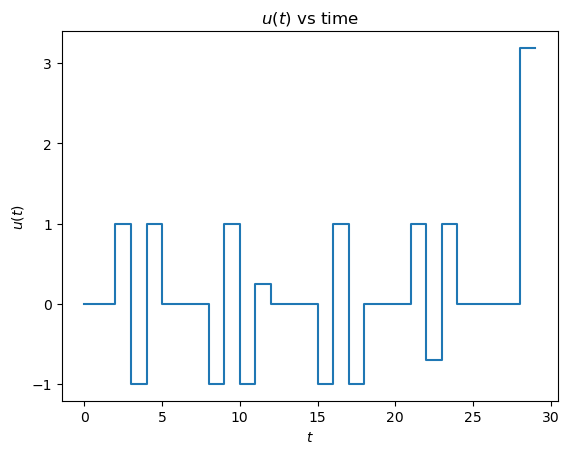

In [73]:
plt.figure()
plt.step(range(N), u_sol)
plt.title('$u(t)$ vs time')
plt.xlabel('$t$')
plt.ylabel('$u(t)$')

print(f"Optimal fuel cost = {prob.value}")